In [34]:
#intial import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [35]:
# saving csv as a variable
csv = "player_stats_20-21 season.csv"

In [36]:
# read csv, rename Team column, drop unneeded columns, and preview df
df = pd.read_csv(csv,parse_dates=True)
df.rename(columns = {'team_abbreviation':'Team'}, inplace=True)
df.rename(columns = {'season_id':'Season'}, inplace=True)
df.rename(columns = {'player_id':'Player'}, inplace=True)
df.rename(columns = {'gp':'GP'}, inplace=True)
df.rename(columns = {'min':'Minutes Played'}, inplace=True)
df.rename(columns = {'pts':'TP'}, inplace=True)
df.rename(columns = {'fg_pct':'FG%'}, inplace=True)
df.rename(columns = {'fg3m':'3P'}, inplace=True)
df.rename(columns = {'fgm':'FG'}, inplace=True)
df.rename(columns = {'fg3_pct':'3P%'}, inplace=True)
df.rename(columns = {'ftm':'FT'}, inplace=True)
df.rename(columns = {'ft_pct':'FT%'}, inplace=True)
df.rename(columns = {'fga':'FGA'}, inplace=True)
df.rename(columns = {'Player':'20-21 Player'}, inplace=True)
df.drop(columns=["player_name","team_id","nba_fantasy_pts","dd2",'td3',"gp_rank","w_rank","l_rank","w_pct_rank","min_rank","fga_rank","blka_rank","pf_rank","pfd_rank","fta_rank","ft_pct_rank","plus_minus_rank","ftm_rank","oreb_rank","dreb_rank","nba_fantasy_pts_rank","dd2_rank","td3_rank","cfid","cfparams"],inplace=True)
df["PPG"]=df["TP"]/df["GP"]
df.head()

,Season,20-21 Player,Team,age,GP,w,l,w_pct,Minutes Played,FG,...,fg3m_rank,fg3a_rank,fg3_pct_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,pts_rank,PPG
0,2020-21,Aaron Gordon,DEN,25.0,50,29,21,0.580,1383.780000,231,...,187,177,275,103,106,94,217,102,156,12.360000
1,2020-21,Aaron Holiday,IND,24.0,66,30,36,0.455,1176.086667,170,...,167,173,187,348,148,160,131,247,203,7.196970
2,2020-21,Aaron Nesmith,BOS,21.0,46,22,24,0.478,668.731667,78,...,238,251,181,295,384,341,342,307,343,4.739130
3,2020-21,Abdel Nader,PHX,27.0,24,16,8,0.667,355.250000,57,...,319,343,51,387,400,367,388,307,367,6.666667
4,2020-21,Adam Mokoka,CHI,22.0,14,3,11,0.214,56.178333,7,...,454,435,477,516,476,461,474,462,500,1.071429


In [15]:
# Use loc to sort by New York Knicks team only and create new varialbe
nyk_df = df.loc[df['Team']=='NYK']
nyk_df

,Season,20-21 Player,Team,age,GP,w,l,w_pct,Minutes Played,FG,...,fg3m_rank,fg3a_rank,fg3_pct_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,pts_rank,PPG
7,2020-21,Alec Burks,NYK,29.0,49,27,22,0.551,1254.560000,210,...,98,124,54,168,169,226,232,233,155,12.714286
129,2020-21,Derrick Rose,NYK,32.0,50,28,22,0.560,1278.858333,287,...,211,230,136,286,77,128,114,182,120,14.680000
157,2020-21,Elfrid Payton,NYK,27.0,63,36,27,0.571,1484.410000,269,...,283,266,369,180,80,83,125,307,151,10.142857
170,2020-21,Frank Ntilikina,NYK,22.0,33,23,10,0.697,322.005000,29,...,300,336,11,436,400,414,323,396,419,2.696970
201,2020-21,Immanuel Quickley,NYK,22.0,64,37,27,0.578,1243.485000,229,...,74,72,131,279,138,189,239,265,121,11.421875
236,2020-21,Jared Harper,NYK,23.0,8,5,3,0.625,16.250000,0,...,480,507,480,530,516,488,511,495,529,0.375000
281,2020-21,Julius Randle,NYK,26.0,71,40,31,0.563,2666.736667,602,...,33,33,61,10,12,4,56,190,7,24.112676
308,2020-21,Kevin Knox II,NYK,21.0,42,26,16,0.619,464.400000,56,...,256,274,119,390,400,379,369,356,364,3.880952
376,2020-21,Mitchell Robinson,NYK,23.0,31,15,16,0.484,852.518333,115,...,480,522,480,139,411,332,199,65,319,8.258065
392,2020-21,Nerlens Noel,NYK,27.0,64,35,29,0.547,1546.608333,137,...,480,486,480,46,319,165,44,3,282,5.062500


In [16]:
# Clean up new df and retain only the needed information
nyk_df = nyk_df.drop(columns=["Season","Team","Minutes Played","age","w","reb","ast","tov","stl","blk","l","w_pct","fg3a","fta","oreb","dreb","fg_pct_rank","fg3m_rank","fg3a_rank","fg3_pct_rank","reb_rank","ast_rank","tov_rank","stl_rank","blk_rank","pts_rank","plus_minus","fgm_rank","pf","pfd","blka"])

In [6]:
# Sort by Knicks Total overall pts for the 2020-21 season
nyk_df.sort_values("Total Points",ascending=False)

,Season,Player,Team,Games Played,Minutes Played,fg_pct,fg3_pct,ft_pct,reb,ast,tov,stl,blk,Total Points
281,2020-21,Julius Randle,NYK,71,2666.736667,0.456,0.411,0.811,724,427,241,64,18,1712
428,2020-21,RJ Barrett,NYK,72,2510.881667,0.441,0.401,0.746,414,217,139,53,20,1264
129,2020-21,Derrick Rose,NYK,50,1278.858333,0.470,0.388,0.866,130,209,78,49,19,734
201,2020-21,Immanuel Quickley,NYK,64,1243.485000,0.395,0.389,0.891,137,127,58,30,12,731
433,2020-21,Reggie Bullock,NYK,65,1949.270000,0.442,0.410,0.909,223,99,45,52,11,709
157,2020-21,Elfrid Payton,NYK,63,1484.410000,0.432,0.286,0.682,216,203,103,47,9,639
7,2020-21,Alec Burks,NYK,49,1254.560000,0.420,0.415,0.856,227,107,49,31,14,623
392,2020-21,Nerlens Noel,NYK,64,1546.608333,0.614,0.000,0.714,407,46,65,70,141,324
376,2020-21,Mitchell Robinson,NYK,31,852.518333,0.653,0.000,0.491,252,17,26,35,45,256
405,2020-21,Obi Toppin,NYK,62,683.080000,0.498,0.306,0.731,138,29,23,17,15,253


In [7]:
# Calculate Points Per Game and add a new column for it
nyk_df["PPG"]=nyk_df["Total Points"]/nyk_df["Games Played"]
nyk_df.sort_values("PPG",ascending=False)

,Season,Player,Team,Games Played,Minutes Played,fg_pct,fg3_pct,ft_pct,reb,ast,tov,stl,blk,Total Points,PPG
281,2020-21,Julius Randle,NYK,71,2666.736667,0.456,0.411,0.811,724,427,241,64,18,1712,24.112676
428,2020-21,RJ Barrett,NYK,72,2510.881667,0.441,0.401,0.746,414,217,139,53,20,1264,17.555556
129,2020-21,Derrick Rose,NYK,50,1278.858333,0.470,0.388,0.866,130,209,78,49,19,734,14.680000
7,2020-21,Alec Burks,NYK,49,1254.560000,0.420,0.415,0.856,227,107,49,31,14,623,12.714286
201,2020-21,Immanuel Quickley,NYK,64,1243.485000,0.395,0.389,0.891,137,127,58,30,12,731,11.421875
433,2020-21,Reggie Bullock,NYK,65,1949.270000,0.442,0.410,0.909,223,99,45,52,11,709,10.907692
157,2020-21,Elfrid Payton,NYK,63,1484.410000,0.432,0.286,0.682,216,203,103,47,9,639,10.142857
376,2020-21,Mitchell Robinson,NYK,31,852.518333,0.653,0.000,0.491,252,17,26,35,45,256,8.258065
478,2020-21,Taj Gibson,NYK,45,935.705000,0.627,0.200,0.727,250,36,22,31,49,241,5.355556
392,2020-21,Nerlens Noel,NYK,64,1546.608333,0.614,0.000,0.714,407,46,65,70,141,324,5.062500


In [18]:
# set index to player
nyk_df.set_index("20-21 Player",inplace=True)
# Sort by Knicks Total overall pts for the 2019-20 season
nyk_df.sort_values("TP",ascending=False)

,GP,FG,FGA,FG%,3P,3P%,FT,FT%,TP,PPG
20-21 Player,,,,,,,,,,
Julius Randle,71,602,1321,0.456,160,0.411,348,0.811,1712,24.112676
RJ Barrett,72,467,1060,0.441,124,0.401,206,0.746,1264,17.555556
Derrick Rose,50,287,611,0.470,50,0.388,110,0.866,734,14.680000
Immanuel Quickley,64,229,580,0.395,118,0.389,155,0.891,731,11.421875
Reggie Bullock,65,248,561,0.442,163,0.410,50,0.909,709,10.907692
Elfrid Payton,63,269,622,0.432,28,0.286,73,0.682,639,10.142857
Alec Burks,49,210,500,0.420,102,0.415,101,0.856,623,12.714286
Nerlens Noel,64,137,223,0.614,0,0.000,50,0.714,324,5.062500
Mitchell Robinson,31,115,176,0.653,0,0.000,26,0.491,256,8.258065


In [19]:
nyk_df["2P"]=nyk_df["FG"]-nyk_df["3P"]-nyk_df["FT"]
nyk_df["2P%"]=nyk_df["2P"]/nyk_df["FG"]

In [20]:
# Calculate Points Per Game and add a new column for it
# nyk_df["PPG"]=nyk_df["Total Points"]/nyk_df["Games Played"]
nyk_df = nyk_df.sort_values("TP",ascending=False)
nyk_df

,GP,FG,FGA,FG%,3P,3P%,FT,FT%,TP,PPG,2P,2P%
20-21 Player,,,,,,,,,,,,
Julius Randle,71,602,1321,0.456,160,0.411,348,0.811,1712,24.112676,94,0.156146
RJ Barrett,72,467,1060,0.441,124,0.401,206,0.746,1264,17.555556,137,0.293362
Derrick Rose,50,287,611,0.470,50,0.388,110,0.866,734,14.680000,127,0.442509
Immanuel Quickley,64,229,580,0.395,118,0.389,155,0.891,731,11.421875,-44,-0.192140
Reggie Bullock,65,248,561,0.442,163,0.410,50,0.909,709,10.907692,35,0.141129
Elfrid Payton,63,269,622,0.432,28,0.286,73,0.682,639,10.142857,168,0.624535
Alec Burks,49,210,500,0.420,102,0.415,101,0.856,623,12.714286,7,0.033333
Nerlens Noel,64,137,223,0.614,0,0.000,50,0.714,324,5.062500,87,0.635036
Mitchell Robinson,31,115,176,0.653,0,0.000,26,0.491,256,8.258065,89,0.773913


In [21]:
# Reindex Columns
column_names = ["GP","PPG","FG","FGA","FG%","2P","2P%","3P","3P%","FT","FT%","TP"]
nyk_df.index[0]

'Julius Randle'

In [22]:
nyk_df = nyk_df.reindex(columns=column_names)
nyk_df

,GP,PPG,FG,FGA,FG%,2P,2P%,3P,3P%,FT,FT%,TP
20-21 Player,,,,,,,,,,,,
Julius Randle,71,24.112676,602,1321,0.456,94,0.156146,160,0.411,348,0.811,1712
RJ Barrett,72,17.555556,467,1060,0.441,137,0.293362,124,0.401,206,0.746,1264
Derrick Rose,50,14.680000,287,611,0.470,127,0.442509,50,0.388,110,0.866,734
Immanuel Quickley,64,11.421875,229,580,0.395,-44,-0.192140,118,0.389,155,0.891,731
Reggie Bullock,65,10.907692,248,561,0.442,35,0.141129,163,0.410,50,0.909,709
Elfrid Payton,63,10.142857,269,622,0.432,168,0.624535,28,0.286,73,0.682,639
Alec Burks,49,12.714286,210,500,0.420,7,0.033333,102,0.415,101,0.856,623
Nerlens Noel,64,5.062500,137,223,0.614,87,0.635036,0,0.000,50,0.714,324
Mitchell Robinson,31,8.258065,115,176,0.653,89,0.773913,0,0.000,26,0.491,256


In [23]:
x,y = nyk_df.FGA/nyk_df.GP, nyk_df.TP/nyk_df.GP

In [24]:
x = np.array(x).reshape(-1,1) # or X = nyk_df.PPG.values.reshape(-1,1)

y = np.array(y).reshape(-1,1)

In [25]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [26]:
#coef is the slope, intercept is y-intercept. y = mx+b
print(model.coef_)
print(model.intercept_)

[[1.23681712]]
[0.00848581]


In [27]:
# In other words, if given an x-value (FGA) that is not in the data set, 
# the model will predict the corresponding y-value (PPG).
# What our model predicted each players PPG for 20-21 season
predicted_y = model.predict(x)
predicted_y

array([[23.02025214],
       [18.21718223],
       [15.12239096],
       [11.21714092],
       [10.68316892],
       [12.21960082],
       [12.62906862],
       [ 4.31802045],
       [ 7.03041524],
       [ 4.17775641],
       [ 4.35108813],
       [ 4.21955361],
       [ 2.96935103],
       [ 1.43558249],
       [ 0.62689437],
       [ 0.66327135]])

Text([0.52941176], [5.11764706], 'Theo Pinson')

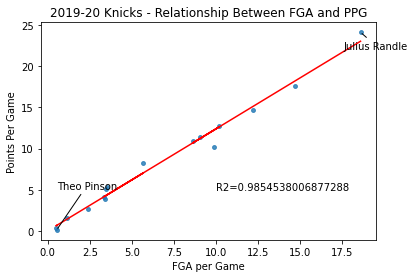

In [33]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
# y is PPG for each kncks player
# x is FGA Per Game
# 2019-20 avgs to predict 20-21 season ave
#plt.scatter(x, y, s=50,alpha=.8)
#plt.plot(x,predicted_y, color='red')
# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)
plt.scatter(x, y, s=15, alpha=.8)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x,predicted_y, color='red')                   # line: Add line for regression line w/ predicted values
plt.title('2019-20 Knicks - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
plt.text(10,5, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly
# Include name for player who scored most points
plt.annotate(nyk_df.index[0],                    # This the name of the top scoring player. Refer to the .head() from earlier
             (x[0], y[0]),                      # This is the point we want to annotate.  
             (x[0]-1,y[0]-2),                  # These are coords for the text
             arrowprops=dict(arrowstyle='-')) 
plt.annotate(nyk_df.index[15],                    # This the name of the top scoring player. Refer to the .head() from earlier
             (x[15], y[15]),                     # This is the point we want to annotate.  
             (x[15],y[15]+5),                  # These are coords for the text
             arrowprops=dict(arrowstyle='-'))

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(x, y, sample_weight=None)
r2 = r2_score(y, predicted_y)
mse = mean_squared_error(y, predicted_y)
rmse = np.sqrt(mse) # The RMSE is simply the square root of the mean squared error. A lower RMSE score (near 0) is ideal and means the model is fit well to the data.
std = np.std(y)